# Solar System Orbits

We can solve the equations of motion for an entire solar system by starting with the first-order differential equations which describe the motion of the Earth orbiting the Sun (for derivation details, see the "Earth-Orbit" notebook).

## Earth Orbit First-Order Equations of Motion

For the Earth orbit problem, we used the following variable substitutions to relate the $(x,y)$ coordinates of the planet and its velocity to a vector of variables $\textbf{z}$.

\begin{equation}
\textbf{z} = \left( z_0, z_1, z_2, z_3 \right) = \left( x, \dot{x}, y, \dot{y} \right)
\end{equation}

These substitutions let us rewrite the equations of motion as the following first-order system:

\begin{align}
\dot{z}_0 &= z_1 \\
\dot{z}_1 &= -G M_\odot \dfrac{z_0}{\left(z_0^2 + z_2^2\right)^{3/2}} \\
\dot{z}_2 &= z_3 \\
\dot{z}_3 &= -G M_\odot \dfrac{z_2}{\left(z_0^2 + z_2^2\right)^{3/2}}
\end{align}

All we need to do the integration now is to write down initial conditions for the integration at $t=0$ so the derivatives are defined. To write the initial conditions, we need the simultaneous position and velocity of the planet, which should be obtained from direct measurement.

For a nearly circular orbit (with a small eccentricity), we can approximate the position and velocity of the planet by starting the planet out on the x-axis $(y(0)=0)$ at an $x$ position equal to the semi-major axis of the orbit $R$ $(x(0)=R)$.

We can likewise set the velocity at such a position to be completely in the $y$ direction $(\dot{x}(0)=0)$ and approximate its magnitude from the semi-major axis $R$ and orbital period $T$ as $\dot{y}(0) = \dfrac{2 \pi R}{T}$.

To avoid numerical difficulties, it's convenient to use units of AU for orbital distances and years for time. Below are the initial conditions for the Earth as described above.

\begin{align}
z_0(t=0) &= x(0) = 152.10 \times 10^6 \ km = 1.017 \ AU \\
z_1(t=0) &= \dot{x}(0) = 0 \ km/s = 0 \ AU/yr \\
z_2(t=0) &= y(0) = 0 \ km = 0 \ AU \\
z_3(t=0) &= \dot{y}(0) = 29.78 \ km/s = 6.2778 \ AU/yr
\end{align}

## Extending Planet-Sun Equations for a Multi-Planet System

We can extend the system of first order differential equations for a single planet above to a solar system with multiple planets very simply. Each new planet (labeled $i$) will be described by its position $(x_i,y_i)$ and velocity $(\dot{x}_i, \dot{y}_i)$.

The integration algorithm we are using requires that all our integration dependent variables be arranged in a vector $\textbf{z}$ so we will set up $\textbf{z}$ as follows for a system of $N$ planets.

Note we start indexing in $\textbf{z}$ at 0 to follow the python convention of 0 being the starting index for arrays.

Also note the label $i$ for the planets runs from 1 (the first planet) to N (the last planet).

\begin{equation}
\textbf{z} = \left(
                \begin{array}{c}
                 z_0 = x_1  \\
                 z_1 = \dot{x}_1   \\
                 z_2 = y_1 \\
                 z_3 = \dot{y}_1 \\
                 z_4 = x_2 \\
                 z_5 = \dot{x}_2 \\
                 z_6 = y_2 \\
                 z_7 = \dot{y}_2 \\
                 .   \\
                 .   \\
                 .   \\
                 z_{4(N-1) + 0} = x_N \\
                 z_{4(N-1) + 1} = \dot{x}_N \\
                 z_{4(N-1) + 2} = y_N \\
                 z_{4(N-1) + 3} = \dot{y}_N \\
                \end{array} 
             \right)
\end{equation}

The next step is to figure out how to write the derivatives of the right hand side of the above vector, so let's write the vector $\textbf{z}$ as follows, using $\textbf{z}_i$ to denote the vector of entries in $\textbf{z}$ corresponding to the $i$-th planet. Recall that $i=1, \ldots, N$ for all the planets.

So we have:

\begin{equation}
\textbf{z} = \left(
                \begin{array}{c}
                 \textbf{z}_1  \\
                 \textbf{z}_2  \\
                 .   \\
                 .   \\
                 .   \\
                 \textbf{z}_N \\
                \end{array} 
             \right)
\end{equation}

And each sub-vector $\textbf{z}_i$ of $\textbf{z}$ has the form $\textbf{z}_i = \left( x_i, \dot{x}_i, y_i, \dot{y}_i \right)$ so we can write the right hand side of the first order differential equations as:

\begin{equation}
\dot{\textbf{z}}_i = \left(
        \begin{array}{l}
         \dot{z}_{4(i-1) + 0} = z_{4(i-1) + 1} \\
         \dot{z}_{4(i-1) + 1} = -G M_\odot \dfrac{z_{4(i-1) + 0}}{\left(z_{4(i-1) + 0}^2 + z_{4(i-1) + 2}^2\right)^{3/2}} \\
         \dot{z}_{4(i-1) + 2} = z_{4(i-1) + 3} \\
         \dot{z}_{4(i-1) + 3} = -G M_\odot \dfrac{z_{4(i-1) + 2}}{\left(z_{4(i-1) + 0}^2 + z_{4(i-1) + 2}^2\right)^{3/2}} \\
        \end{array} 
     \right)
\end{equation}

In the above, the indexes in the right hand side are indexes into the vector $\textbf{z}$.

## Putting it All Together: Code

So we can put the above all together in code to solve a system of equations for any number of planets, accounting only for the planet-sun gravitational force (we have neglected planet-planet gravity so far).

In [1]:
# Import some needed libraries
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.integrate import ode
plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
# First define a few needed constants in kg, km, seconds
mass_solar = 1.0 # Msun
Grav = 39.42 # AU^3/(Msun yr^2)
GM = Grav*mass_solar

In [3]:
def rhs(t, z, n):
    # n is the number of planets
    f = np.zeros(4*n)
    for i in range(1,n+1):
        # set rhs for planets i=1, 2, ..., n
        f[4*(i-1)] = z[4*(i-1)+1]
        f[4*(i-1)+1] = -GM * z[4*(i-1)]/((z[4*(i-1)]**2+z[4*(i-1)+2]**2)**(3.0/2.0))
        f[4*(i-1)+2] = z[4*(i-1)+3]
        f[4*(i-1)+3] = -GM * z[4*(i-1)+2]/((z[4*(i-1)]**2+z[4*(i-1)+2]**2)**(3.0/2.0))
    return f

In [4]:
def doint(tfin, z0, n, npts=1000):
    # tfin is the final integration time
    # z0 is a vector of initial values at t=0
    # n is the number of planets
    # npts is the number of output time points
    
    # report an error if the length of z0 is not 4*n
    if 4*n != len(z0):
        print('ERROR: the number of initial conditions should be 4*n')
        return None, None, -1
    
    # do the integration
    intvode = ode(rhs).set_integrator('dop853', rtol=1.0e-12, atol=1.0e-12)
    t0 = 0.0
    intvode.set_initial_value(z0, t0).set_f_params(n)
    # Interval at which to save the integration data
    save_dt = tfin/npts
    t = [0.0]
    z = [[z0[i]] for i in range(4*n)]
    # ierr = 0 (no error), 
    # ierr = 1 (integration reached tfin)
    # ierr = -1 (other error)
    ierr = 0 
    while (intvode.successful()):
        intvode.integrate(intvode.t + save_dt)
        t.append(intvode.t)
        for i in range(4*n):
            z[i].append(intvode.y[i])
        if intvode.t > tfin:
            break
    t = np.array(t)
    for i in range(4*n):
        z[i] = np.array(z[i])
    if intvode.successful():
        ierr = 0
    else:
        ierr = -1
    return t, z, ierr

## Example: Solar System

We can apply the above to calculate orbits for our solar system using the planetary data supplied by NASA at https://nssdc.gsfc.nasa.gov/planetary/factsheet/

In [9]:
# Our solar system has the following planets
# listed in order from the sun outwards with their
# distance from the sun (millions of km) and orbital period (days)
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
distance_Mkm = np.array([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1, 5906.4])
torbit_days  = np.array([88.0, 224.7, 365.2, 687.0, 4331.0, 10747.0, 30589.0, 59800.0, 90560.0])

# Let's convert these into distances of AU and times of years
# we can just refer to the Earth entries above for the conversions
AU_per_Mkm = 1.0/149.6
years_per_day = 1.0/365.2
distance_AU = distance_Mkm * AU_per_Mkm
torbit_years = torbit_days * years_per_day

# We'll use distance_AU to get our position initial conditions
# But we need to calculate our velocity initial conditions
velocity_AU_per_year = 2*np.pi*distance_AU/torbit_years

# And finally we can construct our initial condition vector z0
N = len(planet_names)
z0 = np.zeros(4*N)
for i in range(1, N+1):
    z0[4*(i-1)]   = distance_AU[i-1]
    z0[4*(i-1)+1] = 0.0
    z0[4*(i-1)+2] = 0.0
    z0[4*(i-1)+3] = velocity_AU_per_year[i-1]

And finally we can do the integration to calculate the orbits ...

In [6]:
# Integrate for 100,000 days
final_time = 1.0e5*years_per_day
Npts = 100000
t, z, ierr = doint(final_time, z0, N, npts=Npts)

First let's get the colors for the plot ...

In [8]:
from ColorPicker import ColorPicker
colorp = ColorPicker()
NHue = 9
NSat = 1
NVal = 1
colors = colorp.pickColors(NHue, NSat, NVal)

And we can plot the orbits over one year ...

In [9]:
def plot_korbit(k):
    plt.rcParams.update({'font.size': 20})
    plt.clf()
    fig, ax = plt.subplots()

    for i in range(1, N+1):
        ax.plot(z[4*(i-1)][:k+1],z[4*(i-1)+2][:k+1], color=colors[i-1])
        ax.plot(z[4*(i-1)][k],z[4*(i-1)+2][k], marker='o', markersize=10, color=colors[i-1])
    ax.plot(0.0, 0.0, marker='*', markersize=7, color='yellow')

    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)

    axins = zoomed_inset_axes(ax, zoom=10, loc=3)

    for i in range(1, N+1):
        axins.plot(z[4*(i-1)][:k+1],z[4*(i-1)+2][:k+1], color=colors[i-1])
        axins.plot(z[4*(i-1)][k],z[4*(i-1)+2][k], marker='o', markersize=10, color=colors[i-1])
    axins.plot(0.0, 0.0, marker='*', markersize=20, color='yellow')

    # sub region of the original image
    x1, x2, y1, y2 = -1.7, 1.7, -1.7, 1.7
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.yaxis.tick_right()
    axins.yaxis.set_ticks_position('both')
    axins.yaxis.set_ticks([-1, 0, 1])
    axins.xaxis.tick_top()
    axins.xaxis.set_ticks_position('both')
    axins.xaxis.set_ticks([-1, 0, 1])

    #plt.xticks(visible=False)
    #plt.yticks(visible=False)
    ax.set_xlabel('(AU)')
    ax.set_ylabel('(AU)')

    # draw a bbox of the region of the inset axes in the parent axes and
    # connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

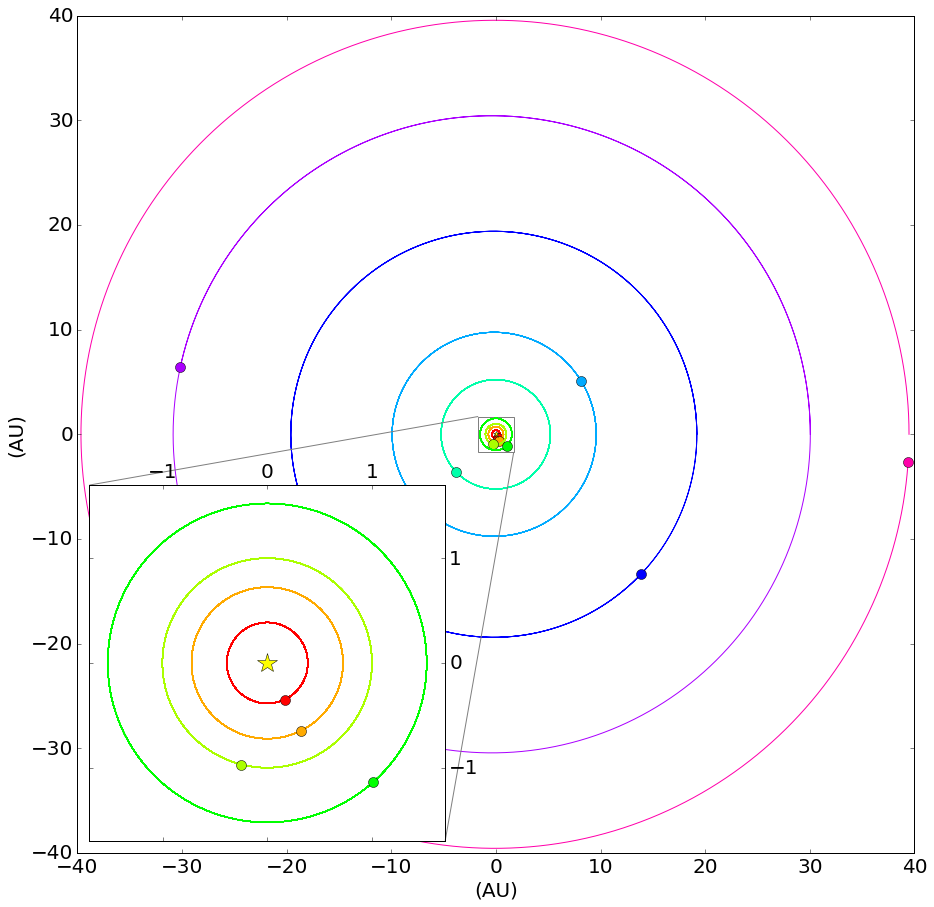

In [10]:
plot_korbit(90000)

In [ ]:
# Let's animate the orbits now ...
import matplotlib.animation as animation
from IPython.display import HTML

plt.clf()
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
axins = zoomed_inset_axes(ax, zoom=10, loc=3) 

# sub region of the original image
x1, x2, y1, y2 = -1.7, 1.7, -1.7, 1.7
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.yaxis.tick_right()
axins.yaxis.set_ticks_position('both')
axins.yaxis.set_ticks([-1, 0, 1])
axins.xaxis.tick_top()
axins.xaxis.set_ticks_position('both')
axins.xaxis.set_ticks([-1, 0, 1])

ax.set_xlabel('(AU)')
ax.set_ylabel('(AU)')

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# Create orbit objects
orbits = []
orbits_in = []
for i in range(1, N+1):
    oi, = ax.plot(z0[4*(i-1)],z0[4*(i-1)+2], color=colors[i-1])
    oii, = axins.plot(z0[4*(i-1)],z0[4*(i-1)+2], color=colors[i-1])
    orbits.append(oi)
    orbits_in.append(oii)

# Create planet objects
planets = []
planets_in = []
for i in range(1, N+1):
    pi, = ax.plot(z0[4*(i-1)],z0[4*(i-1)+2], marker='o', color=colors[i-1])
    pii, = axins.plot(z0[4*(i-1)],z0[4*(i-1)+2], marker='o', color=colors[i-1])
    planets.append(pi)
    planets_in.append(pii)

def animate(i):
    print('i={}'.format(i))
    # update the data for orbits and planets
    for j, oj in enumerate(orbits):
        ij = j + 1
        oj.set_ydata(z[4*(ij-1)+2][:i+1])
        oj.set_xdata(z[4*(ij-1)][:i+1])
    for j, pj in enumerate(planets):
        ij = j + 1
        pj.set_ydata(z[4*(ij-1)+2][i])
        pj.set_xdata(z[4*(ij-1)][i])
    for j, oj in enumerate(orbits_in):
        ij = j + 1
        oj.set_ydata(z[4*(ij-1)+2][:i+1])
        oj.set_xdata(z[4*(ij-1)][:i+1])
    for j, pj in enumerate(planets_in):
        ij = j + 1
        pj.set_ydata(z[4*(ij-1)+2][i])
        pj.set_xdata(z[4*(ij-1)][i])      
    return tuple(orbits+planets)

# Init only required for blitting to give a clean slate.
def init():
    for j, oj in enumerate(orbits):
        ij = j + 1
        oj.set_ydata(0.0)
        oj.set_xdata(z0[4*(ij-1)])
    for j, pj in enumerate(planets):
        ij = j + 1
        pj.set_ydata(0.0)
        pj.set_xdata(z0[4*(ij-1)])
    for j, oj in enumerate(orbits_in):
        ij = j + 1
        oj.set_ydata(0.0)
        oj.set_xdata(z0[4*(ij-1)])
    for j, pj in enumerate(planets_in):
        ij = j + 1
        pj.set_ydata(0.0)
        pj.set_xdata(z0[4*(ij-1)])
    ax.plot(0.0, 0.0, marker='*', markersize=7, color='yellow')
    axins.plot(0.0, 0.0, marker='*', markersize=20, color='yellow')
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)
    return tuple(orbits+planets)

fps = Npts/60.0 # Fit animation into 1 minute

anim = animation.FuncAnimation(fig, animate, np.arange(1, len(t)), init_func=init,
                              interval=1.0/fps, blit=True)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=fps, metadata=dict(artist='Donald E. Willcox'), bitrate=1800)
anim.save('solar-system-orbits.mp4', writer=writer)

HTML(anim.to_html5_video())

i=1
i=2
i=3
i=4
i=5
i=6
i=7
i=8
i=9
i=10
i=11
i=12
i=13
i=14
i=15
i=16
i=17
i=18
i=19
i=20
i=21
i=22
i=23
i=24
i=25
i=26
i=27
i=28
i=29
i=30
i=31
i=32
i=33
i=34
i=35
i=36
i=37
i=38
i=39
i=40
i=41
i=42
i=43
i=44
i=45
i=46
i=47
i=48
i=49
i=50
i=51
i=52
i=53
i=54
i=55
i=56
i=57
i=58
i=59
i=60
i=61
i=62
i=63
i=64
i=65
i=66
i=67
i=68
i=69
i=70
i=71
i=72
i=73
i=74
i=75
i=76
i=77
i=78
i=79
i=80
i=81
i=82
i=83
i=84
i=85
i=86
i=87
i=88
i=89
i=90
i=91
i=92
i=93
i=94
i=95
i=96
i=97
i=98
i=99
i=100
i=101
i=102
i=103
i=104
i=105
i=106
i=107
i=108
i=109
i=110
i=111
i=112
i=113
i=114
i=115
i=116
i=117
i=118
i=119
i=120
i=121
i=122
i=123
i=124
i=125
i=126
i=127
i=128
i=129
i=130
i=131
i=132
i=133
i=134
i=135
i=136
i=137
i=138
i=139
i=140
i=141
i=142
i=143
i=144
i=145
i=146
i=147
i=148
i=149
i=150
i=151
i=152
i=153
i=154
i=155
i=156
i=157
i=158
i=159
i=160
i=161
i=162
i=163
i=164
i=165
i=166
i=167
i=168
i=169
i=170
i=171
i=172
i=173
i=174
i=175
i=176
i=177
i=178
i=179
i=180
i=181
i=182
i=183
i=184
i=18